In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_boston 
boston = load_boston()
bos = pd.DataFrame(boston.data)
y = pd.DataFrame(boston.target)

In [2]:
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
bos.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

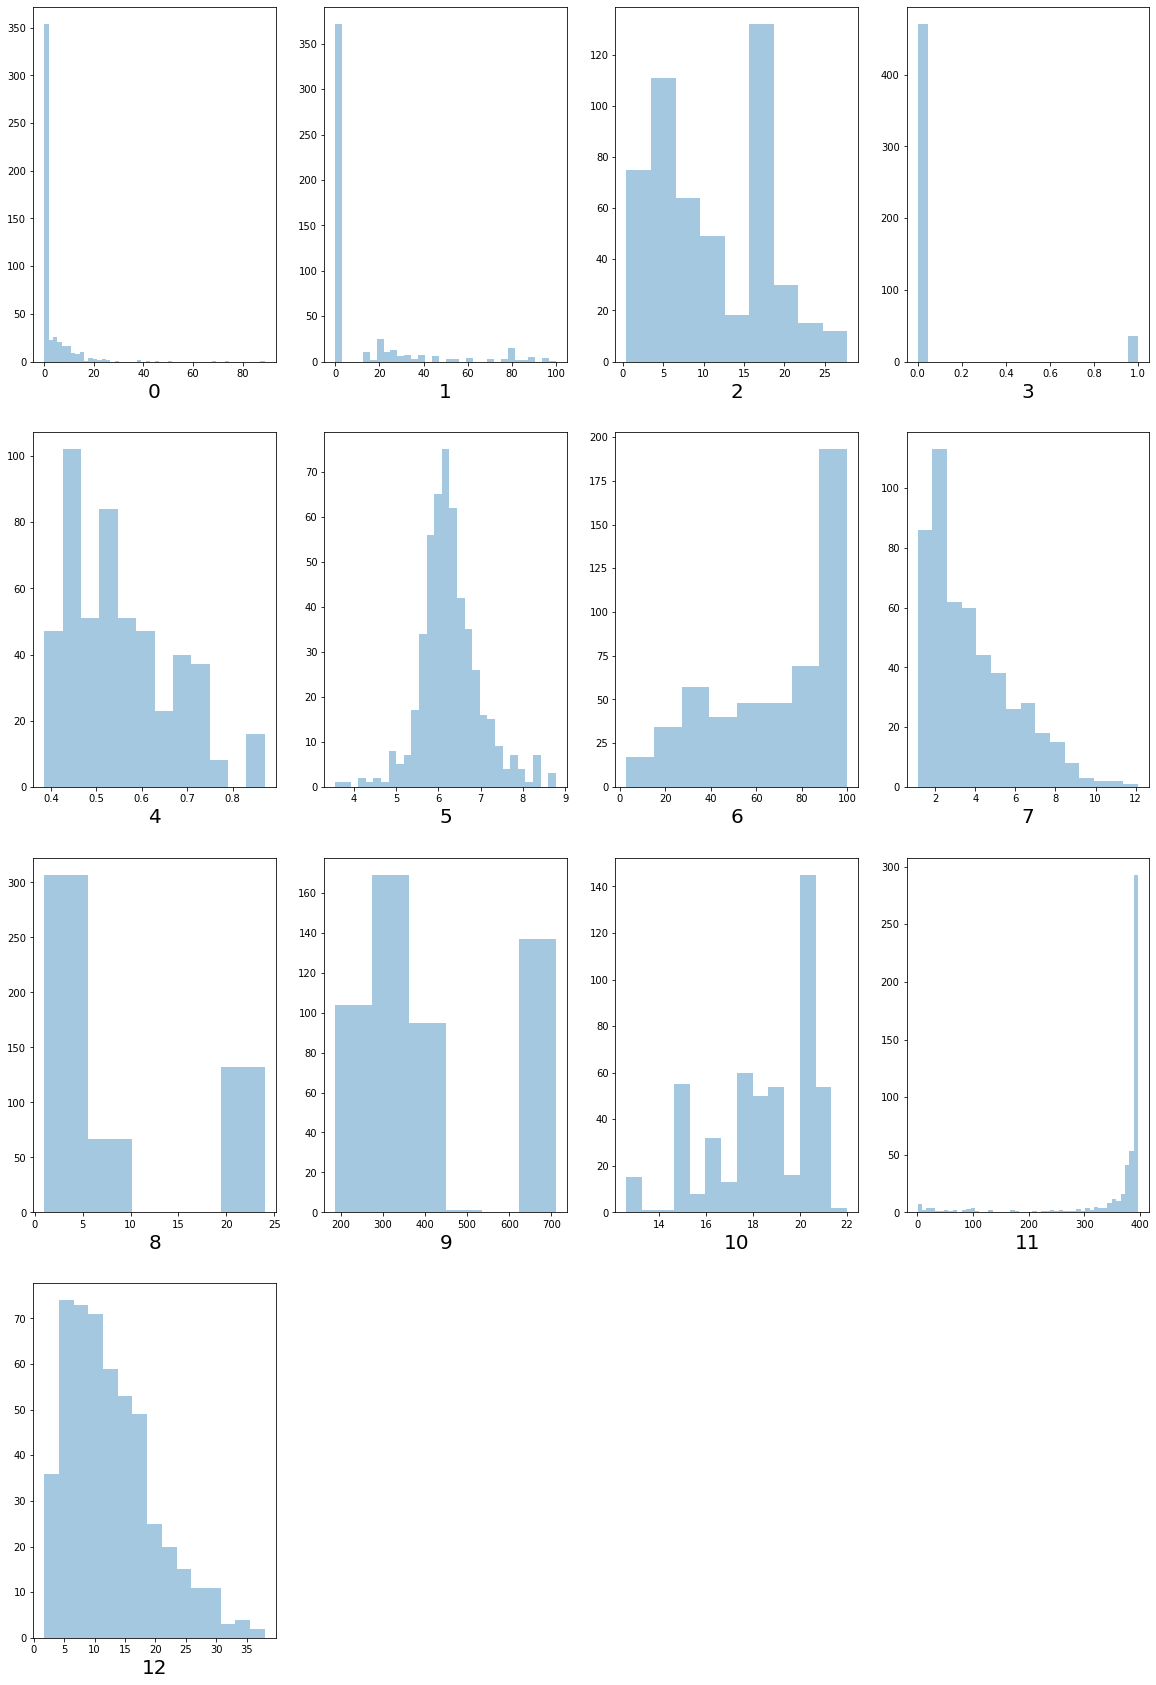

In [4]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column], kde = False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
#plt.tight_layout()

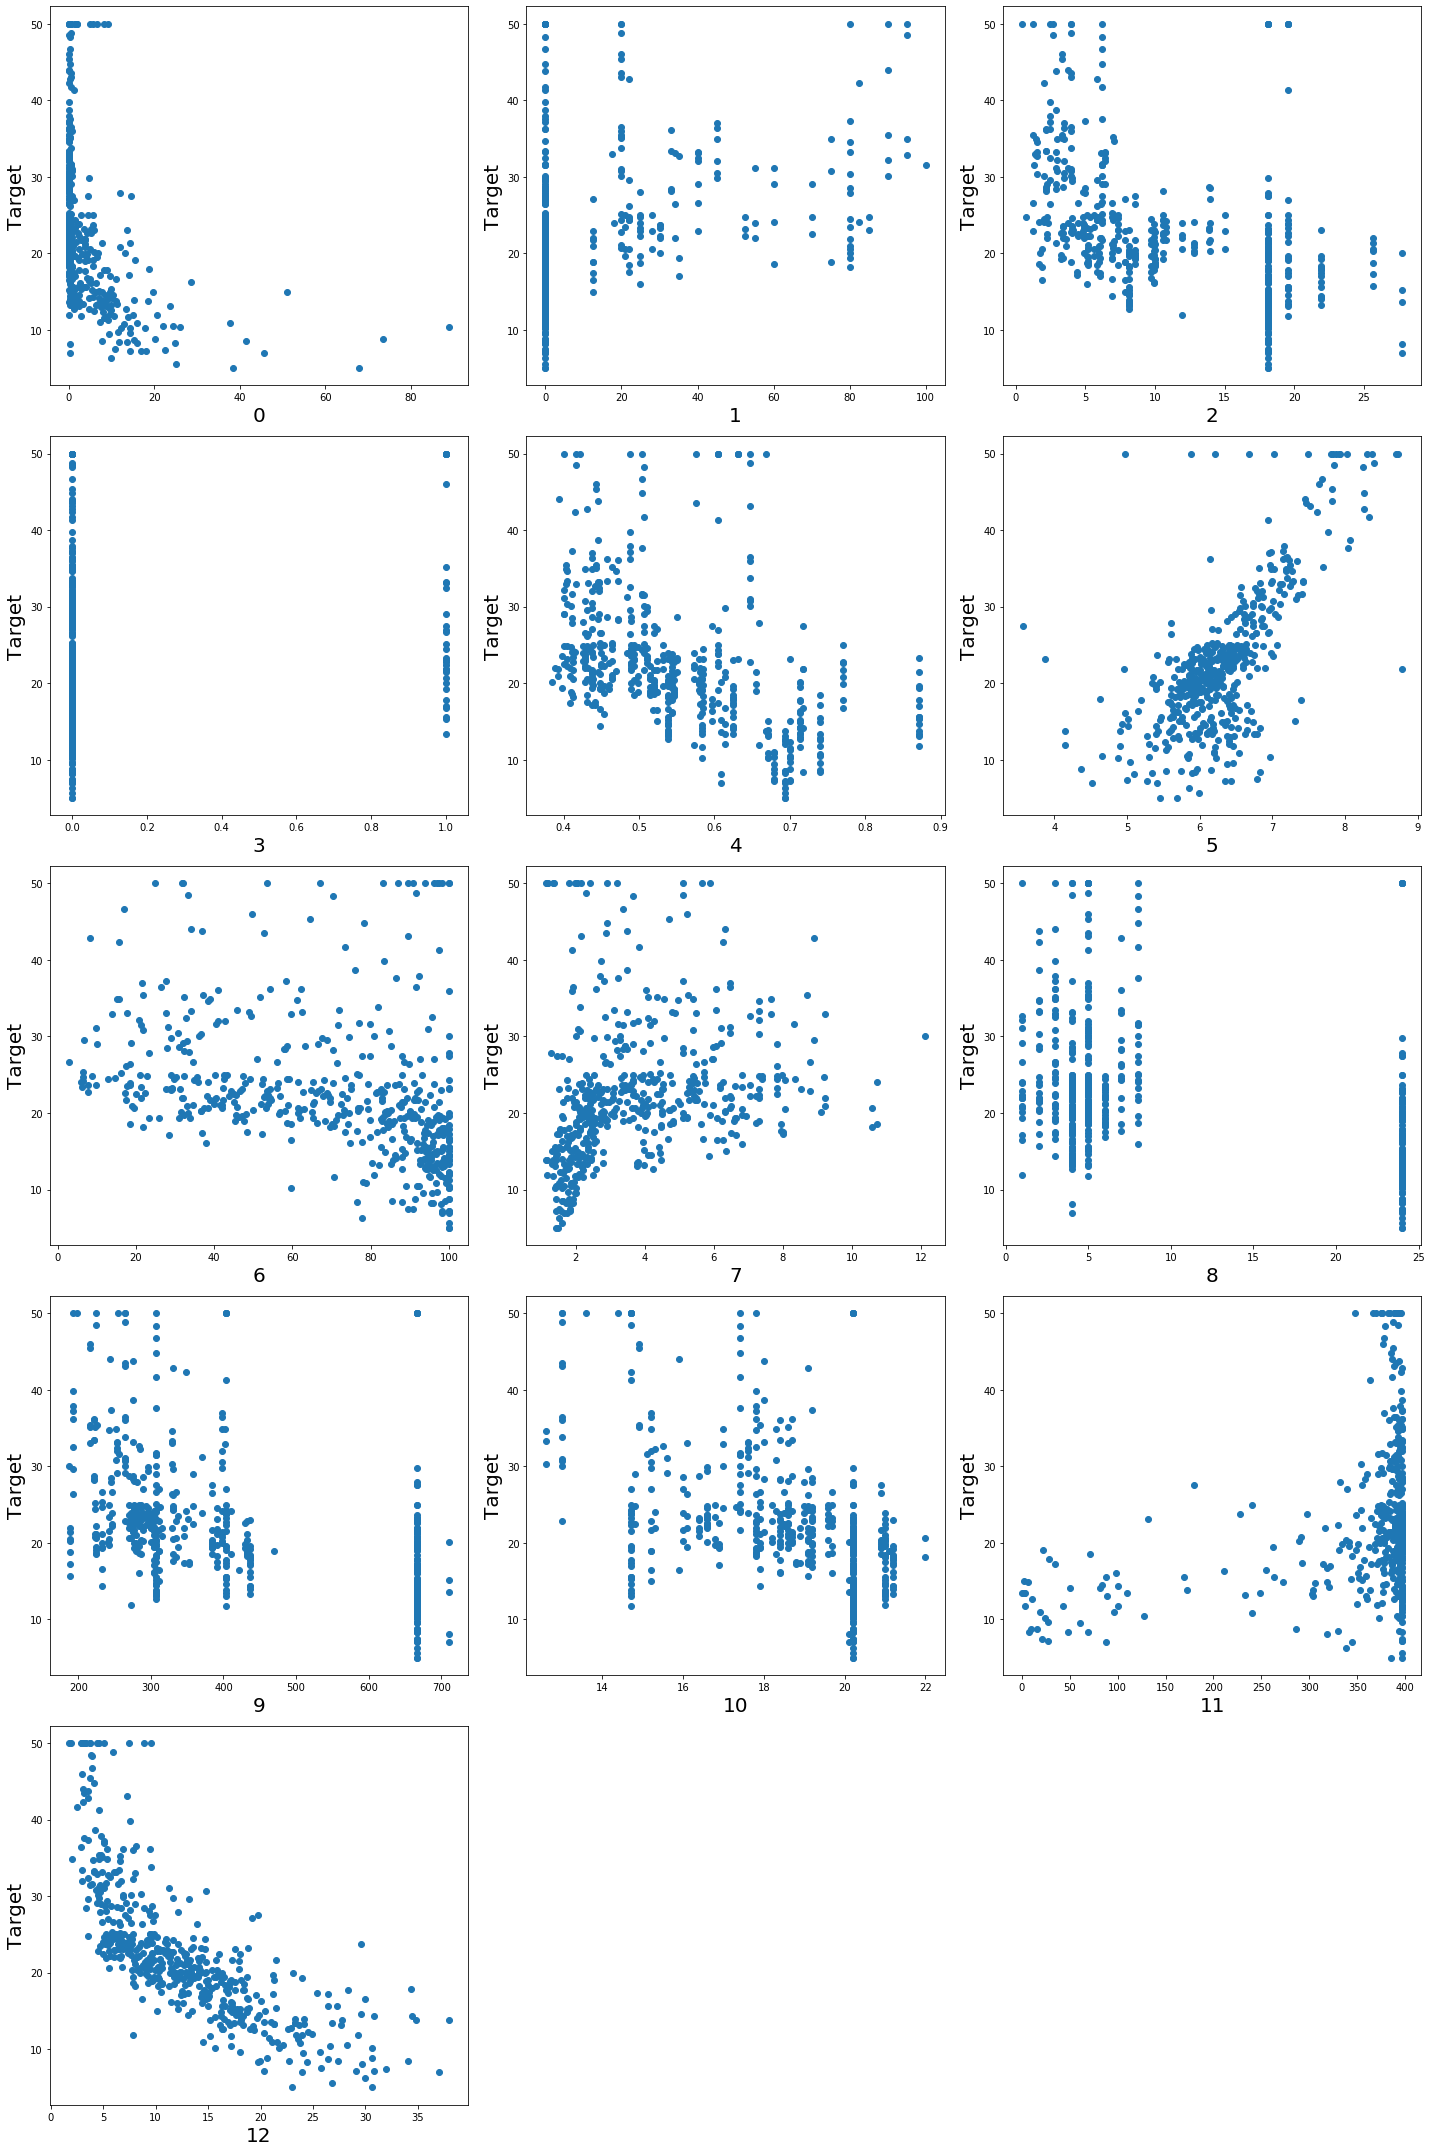

In [5]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=14 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(bos[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Target',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [6]:
scaler =StandardScaler()
bos_scaled = scaler.fit_transform(bos)

In [7]:
variables = bos_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = bos.columns

vif

,VIF,Features
0,1.792192,0
1,2.298758,1
2,3.991596,2
3,1.073995,3
4,4.393720,4
5,1.933744,5
6,3.100826,6
7,3.955945,7
8,7.484496,8
9,9.008554,9


In [8]:
bos = bos.drop(columns=[8,9])
scaler =StandardScaler()
bos_scaled = scaler.fit_transform(bos)

In [9]:
variables = bos_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = bos.columns

vif

,VIF,Features
0,1.478206,0
1,2.154483,1
2,3.179166,2
3,1.057805,3
4,3.901348,4
5,1.872532,5
6,3.075755,6
7,3.954443,7
8,1.496077,10
9,1.316559,11


In [10]:
x_train,x_test,y_train,y_test = train_test_split(bos,y,test_size = 0.25,random_state=355)

In [11]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lm.score(x_train,y_train)

0.7221847012235338

In [13]:
lm.score(x_test,y_test)

0.7325448326094588

In [14]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [15]:
alpha = lasscv.alpha_
alpha

0.005913224207167832

In [16]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.005913224207167832, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
lasso_reg.score(x_test, y_test)

0.7329334147048947

In [18]:
lm.predict(x_test)

array([[15.21134702],
       [20.22341604],
       [30.93802914],
       [23.16147327],
       [ 6.17408426],
       [23.36965094],
       [21.64414192],
       [17.97281982],
       [43.51392098],
       [19.45677328],
       [25.37977492],
       [24.41340704],
       [25.69010881],
       [17.79359742],
       [10.53851291],
       [33.60540567],
       [18.78585597],
       [18.6122545 ],
       [24.24877182],
       [16.44457937],
       [20.08044799],
       [22.32512135],
       [32.41483607],
       [25.09416002],
       [35.57114328],
       [25.14224105],
       [28.14307496],
       [35.55209085],
       [22.03411637],
       [26.6276228 ],
       [20.91792023],
       [24.89367669],
       [15.71902464],
       [21.04674786],
       [18.55990494],
       [24.14227377],
       [37.28157498],
       [18.13594895],
       [30.40244565],
       [32.65816548],
       [22.99462114],
       [15.52108972],
       [18.77347145],
       [18.74412927],
       [19.56989329],
       [20

In [19]:
lm.predict([[0.14356,18,5.64,0.0,0.459,6.66,80.8,5.76,16.9,395.90,8.08]])

array([[26.38060857]])